In [1]:
# Importando as bibliotecas necessarias 
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Conectar o BD sqlite ao Pandas

conn = sql.connect('treinadores.db')
treinadores = pd.read_sql('SELECT * FROM treinadores', conn)

In [36]:
#Lendo uma amostra do dataset
treinadores.head(n=6)

,Ano,Treinador,Time,Nacionalidade,Mesesnocomando,Aproveitamento,Títulos
0,2003,Darío Pereyra,Grêmio,Uruguaio,1,"20,83",0
1,2003,Darío Pereyra,Paysandu,Uruguaio,5,"64,8",0
2,2003,Roberto Rojas,São Paulo,Chileno,7,"60,7",0
3,2004,Hugo De León,Grêmio,Uruguaio,4,"47,6",0
4,2005,D. Passarella,Corinthians,Argentino,2,"55,6",0
5,2006,Matthaus,Athletico-PR,Alemão,2,83,0


In [3]:
# Renomear algumas colunas
treinadores = treinadores.rename(columns={'Mesesnocomando': 'Meses_No_Comando'})
treinadores = treinadores.rename(columns={'Títulos': 'Titulos'})

In [38]:
# Procurando problemas nas variaveis 
treinadores.dtypes

Ano                  int64
Treinador           object
Time                object
Nacionalidade       object
Meses_No_Comando     int64
Aproveitamento      object
Titulos              int64
dtype: object

In [4]:
# Preparação dos dados
treinadores = treinadores.replace({',': '.'}, regex=True)

In [40]:
# Comandos para remover outliers do dataset

#treinadores.duplicated()
# treinadores.dropna() # Encontrar valores nulos
# treinadores.fillna(colocar os valores aqui) # Preencher todos os valores NaN por um outro específico 

In [41]:
# Procurando problemas nas variaveis 
treinadores.dtypes

Ano                  int64
Treinador           object
Time                object
Nacionalidade       object
Meses_No_Comando     int64
Aproveitamento      object
Titulos              int64
dtype: object

In [5]:
# Converter 'Aproveitamento' de objeto p/ ponto flutante  
treinadores["Aproveitamento"] = treinadores["Aproveitamento"].astype(str).astype(float)

In [43]:
# Conferindo
treinadores.dtypes

Ano                   int64
Treinador            object
Time                 object
Nacionalidade        object
Meses_No_Comando      int64
Aproveitamento      float64
Titulos               int64
dtype: object

In [44]:
#Conferindo o resultado das transformações
treinadores.head()

,Ano,Treinador,Time,Nacionalidade,Meses_No_Comando,Aproveitamento,Titulos
0,2003,Darío Pereyra,Grêmio,Uruguaio,1,20.83,0
1,2003,Darío Pereyra,Paysandu,Uruguaio,5,64.80,0
2,2003,Roberto Rojas,São Paulo,Chileno,7,60.70,0
3,2004,Hugo De León,Grêmio,Uruguaio,4,47.60,0
4,2005,D. Passarella,Corinthians,Argentino,2,55.60,0


<AxesSubplot:title={'center':'Ano com o maior nº de treindadores'}>

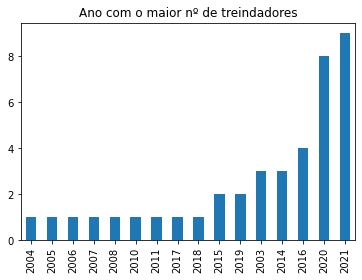

In [45]:
treinadores["Ano"].value_counts().sort_values().plot.bar(title="Ano com o maior nº de treindadores")

<AxesSubplot:>

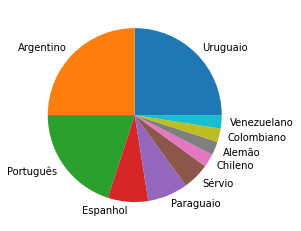

In [46]:
treinadores["Nacionalidade"].value_counts().plot.pie(ylabel='')

<AxesSubplot:title={'center':'Treinador'}>

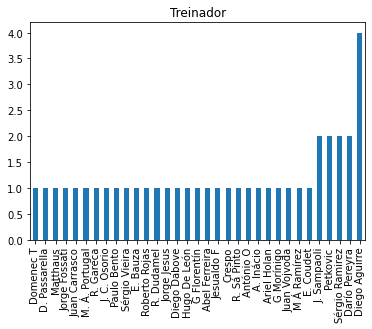

In [94]:
treinadores["Treinador"].value_counts().sort_values().plot.bar(title="Treinador")

<AxesSubplot:title={'center':'Clubes com o maior nº de Treinadores'}>

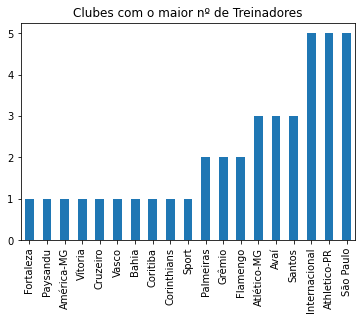

In [12]:
treinadores["Time"].value_counts().sort_values().plot.bar(title="Clubes com o maior nº de Treinadores")

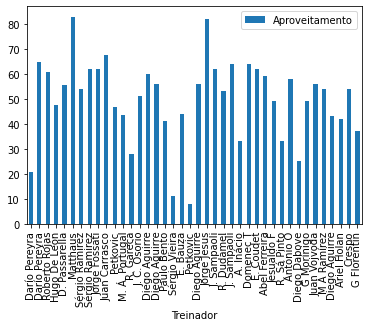

In [9]:
df = pd.DataFrame(treinadores,columns=['Treinador','Aproveitamento'])
ax = df.plot.bar(x = 'Treinador', y= 'Aproveitamento')

<AxesSubplot:>

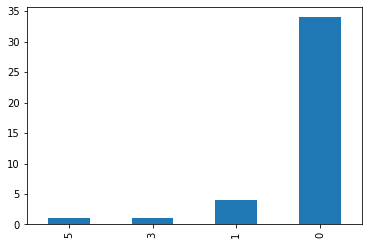

In [10]:
treinadores["Titulos"].value_counts().sort_values().plot.bar(ylabel='')

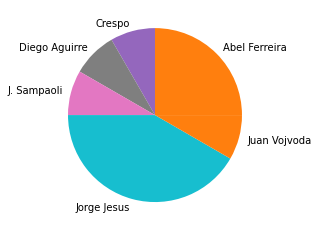

In [12]:
df = pd.DataFrame(treinadores,columns=['Treinador','Titulos'])

df.groupby(['Treinador']).sum().plot(kind='pie', y='Titulos', ylabel='')
plt.legend().remove()

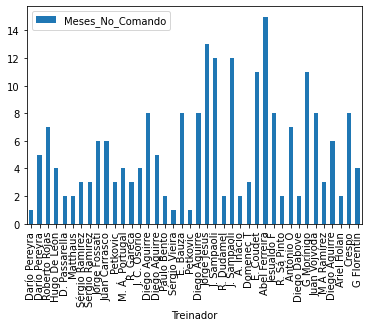

In [11]:
df = pd.DataFrame(treinadores,columns=['Treinador','Meses_No_Comando'])
ax = df.plot.bar(x = 'Treinador', y= 'Meses_No_Comando')

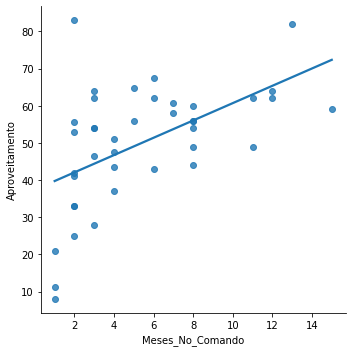

In [9]:
treinadores = pd.DataFrame(treinadores,columns=['Meses_No_Comando','Aproveitamento'])

# Load data into DataFrame
df = pd.DataFrame(treinadores);

_ = sns.lmplot(x = 'Meses_No_Comando', y= 'Aproveitamento', data=df, ci=None)

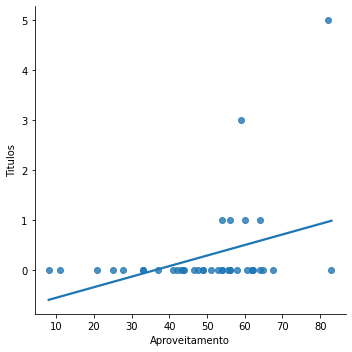

In [7]:
treinadores = pd.DataFrame(treinadores,columns=['Aproveitamento', 'Titulos'])

# Load data into DataFrame
df = pd.DataFrame(treinadores);

_ = sns.lmplot(x = 'Aproveitamento', y= 'Titulos', data=df, ci=None)

<AxesSubplot:ylabel='Frequency'>

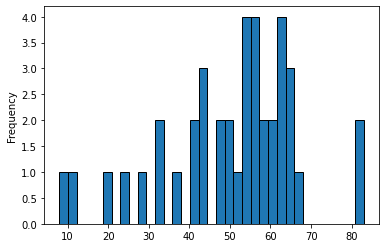

In [8]:
treinadores["Aproveitamento"].plot.hist(bins=35, edgecolor='black')

In [6]:
# adicionando uma nova coluna na tabela treinadores
nacionalidade = treinadores["Nacionalidade"].unique()
nacionalidade

array(['Uruguaio', 'Chileno', 'Argentino', 'Alemão', 'Sérvio', 'Espanhol',
       'Colombiano', 'Português', 'Paraguaio', 'Venezuelano'],
      dtype=object)

In [7]:
# Agrupamentos
gender_total_item_price = treinadores.groupby(["Nacionalidade"]).mean()["Meses_No_Comando"]
gender_b_item_price = treinadores.groupby(["Nacionalidade"]).mean()["Aproveitamento"]
gender_a_item_price = treinadores.groupby(["Nacionalidade"]).sum()["Titulos"]
purchase_count = treinadores.groupby(["Nacionalidade"]).count()["Titulos"]

# Armazenando o resultado em um Dataframe
gender_purchasing_analysis = pd.DataFrame({"Quantidade" : purchase_count, 
                                           "Aproveitamento médio" : gender_b_item_price,
                                           "Títulos" : gender_a_item_price,
                                           "Médio tempo no comando" : gender_total_item_price})

# Data Munging
gender_purchasing_analysis = gender_purchasing_analysis.round(2)
gender_purchasing_analysis ["Médio tempo no comando"] = gender_purchasing_analysis["Médio tempo no comando"].map("{:,.2f}".format)
gender_purchasing_analysis ["Títulos"] = gender_purchasing_analysis["Títulos"].map("{:}".format)
gender_purchasing_analysis ["Aproveitamento médio"] = gender_purchasing_analysis["Aproveitamento médio"].map("{:,.2f}".format)

In [8]:
gender_purchasing_analysis

,Quantidade,Aproveitamento médio,Títulos,Médio tempo no comando
Nacionalidade,,,,
Alemão,1,83.00,0,2.00
Argentino,10,49.24,3,6.80
Chileno,1,60.70,0,7.00
Colombiano,1,51.00,0,4.00
Espanhol,3,53.87,0,3.33
Paraguaio,3,47.33,0,7.67
Português,8,45.76,8,6.25
Sérvio,2,27.30,0,2.00
Uruguaio,10,53.79,1,4.70


In [ ]:
conn.close()